In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 26 17:26:10 2020
@author: Rai Kanwar Taimoor
@adapted by Wenhan Yang on Wed May 5 2020
"""

import numpy as np
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

def to_lower(arr):
    for i in range(0,len(arr)):
        arr[i] = arr[i].lower()
    return arr
def attach(mat1,mat2):
    mat2 = np.reshape(mat2,(1,(len(mat2)*len(mat2[0])*len(mat2[0][0]))))
    if (type(mat1) != np.ndarray):
        mat1 = np.array(mat1)
        mat1 = mat2
    else:
        mat1 = np.append(mat1, mat2, axis=0)
    return mat1
def get_pic_matrix(input_data, filepath):
    #initialize a new array to hold vectorized pics
    input_pics = []
    #two new list to record imgs' idx where they fail to open or process
    idx_exception = []
    #transfrom the corresponding pictures into matrices, then vectors.
    #for train_pics in X_train:
    for i in range(0, len(input_data)):
        try:
            image = img.imread(filepath + input_data[i])
        except:
            #record "throw-away" pics' idx
            idx_exception.append(i)
            continue
        input_pics = attach(input_pics,image)
    return input_pics, idx_exception

In [2]:
# Initialization
my_data = pd.read_csv('facial_expressions-master/data/legend.csv').values
X_data = my_data[:, 1]
y_data = my_data[:, 2]
y_data = to_lower(y_data)
# #y_data into int labels
# y_dict, y_data = label_to_num(y_data)

# Spiliting Data 67-33 ratio as said by sir
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.33,random_state=0)

In [3]:
my_path = "facial_expressions-master/resized_images/"
X_train_pics, idx_train_exception = get_pic_matrix(X_train, my_path)
X_test_pics, idx_test_exception = get_pic_matrix(X_test, my_path)
#throw away unprocessable imgs' idx for y data
y_train = np.delete(y_train,idx_train_exception,axis = 0)
y_test = np.delete(y_test,idx_test_exception,axis = 0)
#convert X_data to ndarray
X_train_pics = np.array(X_train_pics)
X_test_pics = np.array(X_test_pics)
X_train_pics, X_test_pics = X_train_pics / 255.0, X_test_pics / 255.0

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pics)

X_train = scaler.transform(X_train_pics)
X_test = scaler.transform(X_test_pics)

In [5]:
np.unique(y_test)

array(['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral',
       'sadness', 'surprise'], dtype=object)

In [6]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)


In [7]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   0    0    0    0   31   39    1    3]
 [   0    0    0    0    0    2    0    0]
 [   1    0    5    0   39   21    2    0]
 [   0    0    0    0    5    3    0    0]
 [   0    0    2    0 1406  438    0    0]
 [   0    0    2    0  451 1851    0    1]
 [   0    0    3    0   32   52    3    1]
 [   0    0    0    0   18  100    0    6]]
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        74
    contempt       0.00      0.00      0.00         2
     disgust       0.42      0.07      0.12        68
        fear       0.00      0.00      0.00         8
   happiness       0.71      0.76      0.73      1846
     neutral       0.74      0.80      0.77      2305
     sadness       0.50      0.03      0.06        91
    surprise       0.55      0.05      0.09       124

   micro avg       0.72      0.72      0.72      4518
   macro avg       0.36      0.21      0.22      4518
weighted avg       0.70      0.72      0.70      4518

0.72

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
#visualizing confusion matrix in a heat map
import seaborn as sns
import matplotlib.pyplot as plt
def plot_heatmap(y_true,confusion_matrix):
    labels = np.unique(y_true)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix, columns = column, index = indices)
    return sns.heatmap(table, annot=True, fmt='d',linewidths=.5,cmap="YlGnBu")

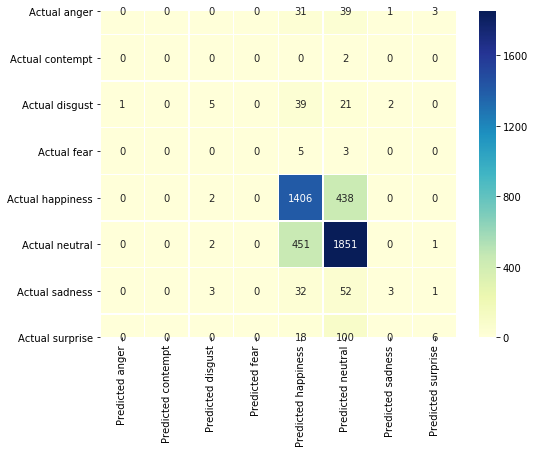

In [11]:
plt.subplots(figsize=(8, 6))
plot_heatmap(y_test,confusion_matrix(y_test,y_pred))